In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
from matplotlib.ticker import ScalarFormatter

In [46]:
#**** DATA WRANGLING ****
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered_csv = pd.read_csv(url_recovered)

In [47]:
recovered_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8674,8792,8920,9066,9202,9371,9674,9897,10040,10342
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,797,797,797,799,799,799,799,799,799,800
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,77,77,81,81,81,81,93,93,97,97


In [48]:
print(recovered_csv.shape)

(253, 167)


In [49]:
print(recovered_csv.isnull().values.any())

True


In [50]:
print(recovered_csv.columns[recovered_csv.isna().any()].tolist())

['Province/State']


In [51]:
recovered_csv.notna().any()

Province/State    True
Country/Region    True
Lat               True
Long              True
1/22/20           True
                  ... 
6/28/20           True
6/29/20           True
6/30/20           True
7/1/20            True
7/2/20            True
Length: 167, dtype: bool

In [52]:
recovered_csv.isna().sum()

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/28/20             0
6/29/20             0
6/30/20             0
7/1/20              0
7/2/20              0
Length: 167, dtype: int64

In [53]:
recovered_csv.dropna()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,105,105,105,105,105,105,105,105,105,105
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,2771,2776,2782,2784,2784,2784,2784,2787,2787,2789
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1053,1054,1054,1054,1054,1054,1054,1054,1054,1054
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,436,436,436,436,436,436,436,436,436,436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
237,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
242,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
244,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13


In [54]:
recovered_MMSM = recovered_csv.copy()
recovered_MMSM['max'] = recovered_MMSM.iloc[:,4:].max(axis=1)
recovered_MMSM['min'] = recovered_MMSM.iloc[:,4:].min(axis=1)
recovered_MMSM['sum'] = recovered_MMSM.iloc[:,4:].sum(axis=1)
recovered_MMSM['mean'] = recovered_MMSM.iloc[:,4:].mean(axis=1)

In [55]:
recovered_MMSM.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,max,min,sum,mean
24,NaN,Belize,13.1939,-59.5432,0,0,0,0,0,0,...,18,18,18,18,18,18,18,0,1097,13.216867
87,NaN,Dominica,15.4150,-61.3710,0,0,0,0,0,0,...,18,18,18,18,18,18,18,0,1227,14.783133
162,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,2834,3013,3134,3194,4656,5320,5320,0,58763,707.987952
190,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,0,...,122128,124755,127118,130766,132760,137669,137669,0,4051127,48808.759036
43,Fujian,China,26.0789,117.9874,0,0,0,0,0,0,...,357,357,357,359,359,359,359,0,44278,533.469880


In [56]:
recovered_CountryMax = recovered_MMSM.groupby('Country/Region')['max'].sum()
recovered_CountryMax

Country/Region
Afghanistan           16041
Albania                1559
Algeria               10342
Andorra                 800
Angola                   97
                      ...  
West Bank and Gaza      460
Western Sahara            8
Yemen                   513
Zambia                 1348
Zimbabwe                173
Name: max, Length: 188, dtype: int64

In [57]:
#**** VISUALIZATION 1 ****

# Drop unecessary columns, group by country to get totals
recovered_total_by_date = recovered_csv.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
# Melt the dataframe into a tidy format
recovered_total_by_date = recovered_total_by_date.melt(id_vars=['Country/Region'], var_name='Date', value_name='Recoveries')
recovered_total_by_date['Date'] = pd.to_datetime(recovered_total_by_date.Date)
recovered_total_by_date = recovered_total_by_date.drop('Country/Region', axis=1).groupby('Date').sum().reset_index()
recovered_total_by_date

,Date,Recoveries
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
158,2020-06-28,5140899
159,2020-06-29,5235813
160,2020-06-30,5353205
161,2020-07-01,5469134


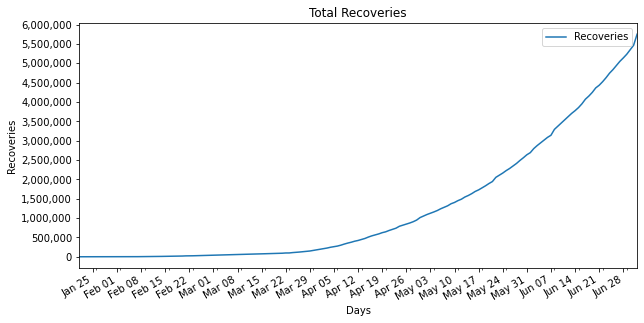

In [58]:
recovered_total_by_date.plot(x="Date", y="Recoveries", figsize=(10,5))
plt.title('Total Recoveries')
plt.xlabel('Days')
plt.ylabel('Recoveries')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(500000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()

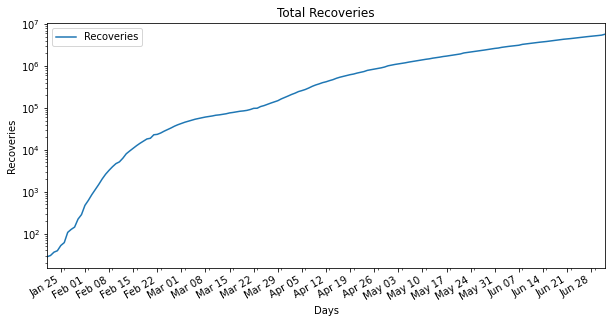

In [59]:
recovered_total_by_date.plot(x="Date", y="Recoveries", figsize=(10,5))
plt.title('Total Recoveries')
plt.xlabel('Days')
plt.ylabel('Recoveries')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gcf().autofmt_xdate() # Rotation
plt.yscale('log')
plt.show()

In [60]:
daily_recovered = recovered_total_by_date
daily_recovered.insert(2, "New Recoveries", daily_recovered['Recoveries'].diff(), True)
daily_recovered['New Recoveries'] = np.where(daily_recovered['New Recoveries'].isnull(),daily_recovered['Recoveries'],daily_recovered['New Recoveries']).astype(int)
daily_recovered = daily_recovered.drop(['Recoveries'], axis=1)
daily_recovered

,Date,New Recoveries
0,2020-01-22,28
1,2020-01-23,2
2,2020-01-24,6
3,2020-01-25,3
4,2020-01-26,13
...,...,...
158,2020-06-28,89035
159,2020-06-29,94914
160,2020-06-30,117392
161,2020-07-01,115929


In [61]:
daily_recovered['3 Day Rolling Average'] = daily_recovered['New Recoveries'].rolling(3).mean()
daily_recovered = daily_recovered.dropna()
daily_recovered

,Date,New Recoveries,3 Day Rolling Average
2,2020-01-24,6,12.000000
3,2020-01-25,3,3.666667
4,2020-01-26,13,7.333333
5,2020-01-27,9,8.333333
6,2020-01-28,46,22.666667
...,...,...,...
158,2020-06-28,89035,100659.333333
159,2020-06-29,94914,96752.000000
160,2020-06-30,117392,100447.000000
161,2020-07-01,115929,109411.666667


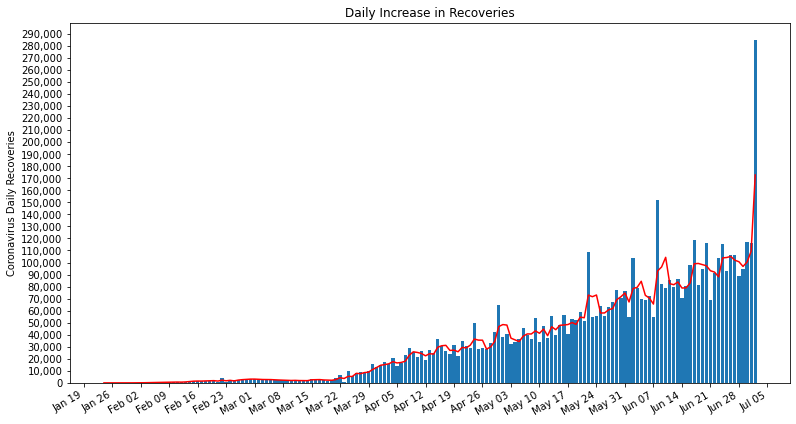

In [62]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
plt.plot(daily_recovered['Date'], daily_recovered['3 Day Rolling Average'], color='r')
ax.bar(daily_recovered['Date'],daily_recovered['New Recoveries'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gcf().autofmt_xdate() #Rotation
plt.title('Daily Increase in Recoveries')
plt.ylabel('Coronavirus Daily Recoveries')
plt.show()

In [63]:
#**** VISUALIZATION 2 ****
# Drop unecessary columns, group by country to get totals
recovered_since_10th_recovery = recovered_csv.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
# Melt the dataframe into a tidy format
recovered_since_10th_recovery = recovered_since_10th_recovery.melt(id_vars=['Country/Region'], var_name='Date', value_name='Recoveries')
recovered_since_10th_recovery['Date'] = pd.to_datetime(recovered_since_10th_recovery.Date)
recovered_since_10th_recovery

,Country/Region,Date,Recoveries
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
30639,West Bank and Gaza,2020-07-02,460
30640,Western Sahara,2020-07-02,8
30641,Yemen,2020-07-02,513
30642,Zambia,2020-07-02,1348


In [64]:
recovered_since_10th_recovery = recovered_since_10th_recovery[recovered_since_10th_recovery.Recoveries >= 10]
recovered_since_10th_recovery

,Country/Region,Date,Recoveries
36,China,2020-01-22,28
224,China,2020-01-23,30
412,China,2020-01-24,36
600,China,2020-01-25,39
788,China,2020-01-26,49
...,...,...,...
30638,Vietnam,2020-07-02,340
30639,West Bank and Gaza,2020-07-02,460
30641,Yemen,2020-07-02,513
30642,Zambia,2020-07-02,1348


In [65]:
recovery_10_by_country = recovered_since_10th_recovery.groupby('Country/Region').first().reset_index()
recovery_10_by_country.drop('Recoveries', axis=1)

,Country/Region,Date
0,Afghanistan,2020-04-02
1,Albania,2020-03-24
2,Algeria,2020-03-14
3,Andorra,2020-03-30
4,Angola,2020-05-01
...,...,...
179,Vietnam,2020-02-21
180,West Bank and Gaza,2020-03-20
181,Yemen,2020-05-22
182,Zambia,2020-04-09


In [66]:
recovered_since_10th_recovery.sort_values(['Country/Region', 'Date'])
D_List = recovered_since_10th_recovery['Country/Region'].unique()
compiled_df = pd.DataFrame(columns=['Country/Region', 'Date', 'Recoveries'])

for d in D_List: #for every country
    temp = recovered_since_10th_recovery.loc[recovered_since_10th_recovery['Country/Region'] == d]#Here are the recovered over 10 for that country
    temp = temp.assign(recovery10 = lambda x: temp['Date'] - temp.loc[temp['Country/Region'] == temp['Country/Region'], 'Date'].iloc[0])#for each of these,subtract dates
    compiled_df = compiled_df.append(temp, ignore_index=True)
    
compiled_df['recovery10'] = compiled_df.apply(lambda row: row.recovery10.days, axis=1)
recovered_since_10th_recovery = compiled_df.rename(columns={'recovery10': 'Days since 10th recovery'})

recovered_since_10th_recovery

,Country/Region,Date,Recoveries,Days since 10th recovery
0,China,2020-01-22,28,0
1,China,2020-01-23,30,1
2,China,2020-01-24,36,2
3,China,2020-01-25,39,3
4,China,2020-01-26,49,4
...,...,...,...,...
16328,Suriname,2020-06-30,227,15
16329,Suriname,2020-07-01,242,16
16330,Suriname,2020-07-02,252,17
16331,Lesotho,2020-07-01,11,0


In [67]:
recovered_since_10th_recovery_groupby = recovered_since_10th_recovery.groupby(['Country/Region', 'Date'])
recovered_since_10th_recovery_groupby.first()

Recoveries  Days since 10th recovery
Country/Region Date                                            
Afghanistan    2020-04-02          10                         0
               2020-04-03          10                         1
               2020-04-04          10                         2
               2020-04-05          15                         3
               2020-04-06          18                         4
...                               ...                       ...
Zimbabwe       2020-06-28         142                        46
               2020-06-29         152                        47
               2020-06-30         162                        48
               2020-07-01         166                        49
               2020-07-02         173                        50

[16333 rows x 2 columns]

In [68]:
recovered_since_10th_recovery_graph = recovered_since_10th_recovery.copy()
recovered_since_10th_recovery_graph = recovered_since_10th_recovery_graph.set_index(["Country/Region", "Days since 10th recovery"])
recovered_since_10th_recovery_graph = recovered_since_10th_recovery_graph.unstack('Country/Region')['Recoveries']

recovered_since_10th_recovery_graph.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Days since 10th recovery,,,,,,,,,,,,,,,,,,,,,
0,10,10,12,10,11,10,52,14,10,112,...,12,18,41,12,15,14,17,11,24,12
1,10,17,12,10,11,10,52,16,10,225,...,17,18,62,25,15,14,17,11,25,13
2,10,17,12,10,11,11,63,18,10,225,...,17,18,68,25,15,14,17,10,28,13
3,15,31,12,10,11,11,72,28,10,479,...,17,19,86,25,15,14,17,10,30,13
4,18,31,12,16,11,11,72,30,11,636,...,17,19,93,30,15,16,17,10,30,17


In [69]:
highlighted_countries = ['US', 'Spain', 'Italy', 'Germany', 'United Kingdom', 'France', 'Korea, South', 'Ireland', 'Singapore', 'Japan']
gray_countries = recovery_10_by_country['Country/Region'].tolist()
gray_countries = [e for e in gray_countries if e not in highlighted_countries]
#Is 'US' in the list? If not, it works
'US' in gray_countries

False

In [70]:
last_recovery_by_country = recovered_since_10th_recovery.groupby('Country/Region').last().reset_index()
last_recovery_by_country = last_recovery_by_country.drop('Date', axis=1)
last_recovery_by_country

,Country/Region,Recoveries,Days since 10th recovery
0,Afghanistan,16041,91
1,Albania,1559,100
2,Algeria,10342,110
3,Andorra,800,94
4,Angola,97,62
...,...,...,...
179,Vietnam,340,132
180,West Bank and Gaza,460,104
181,Yemen,513,41
182,Zambia,1348,84


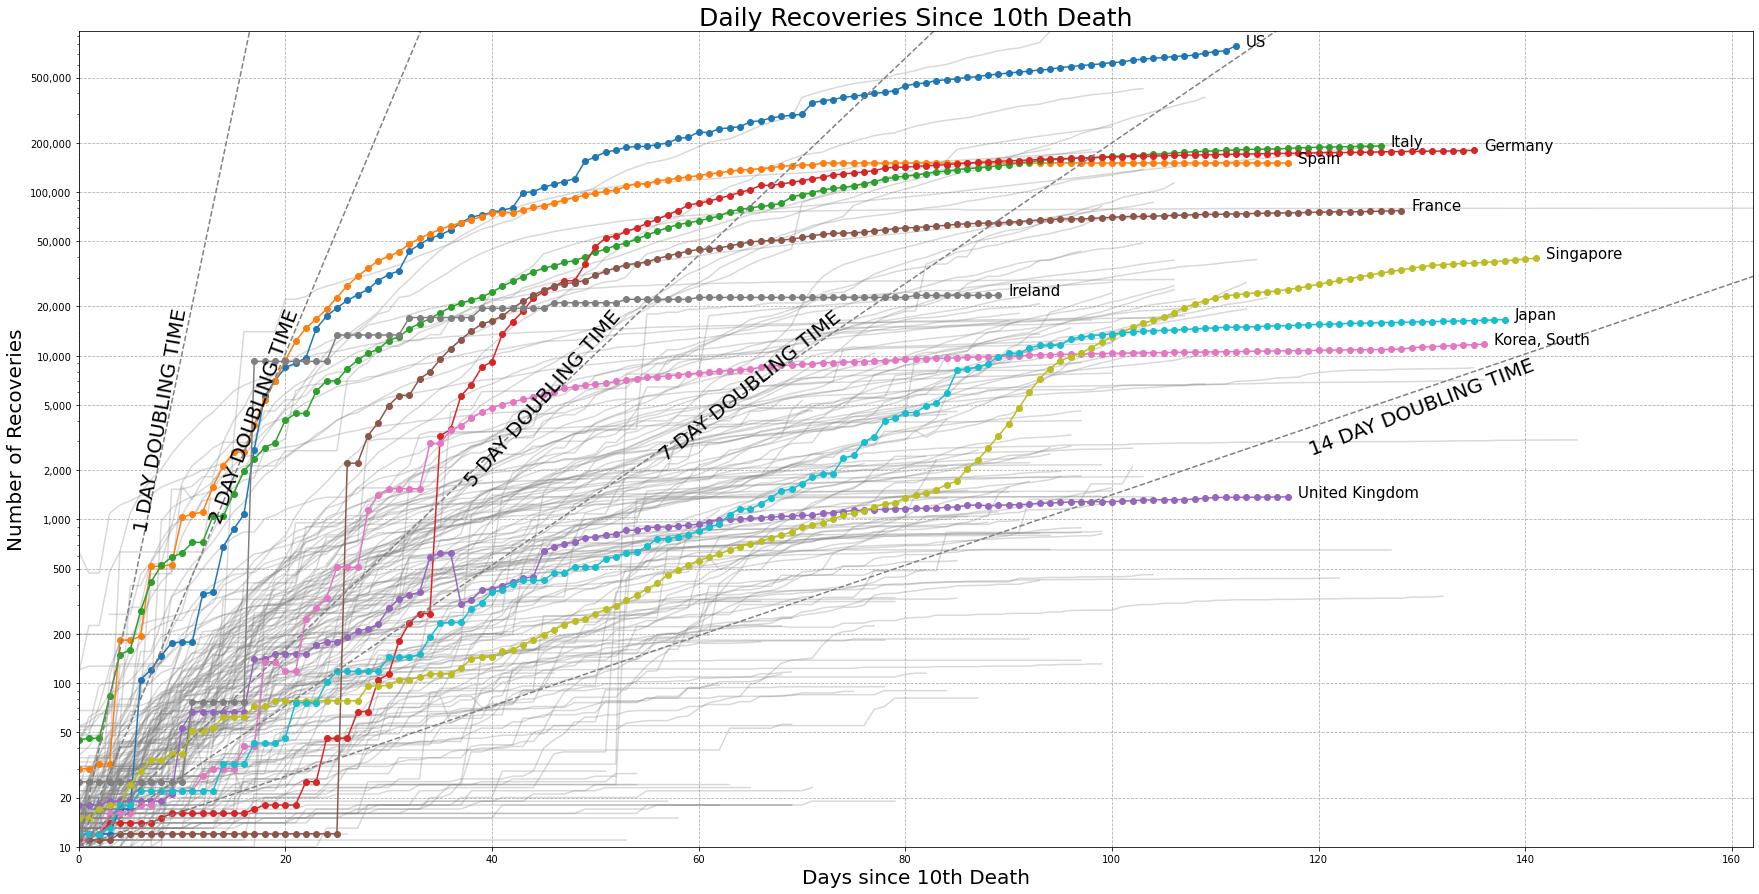

In [71]:
plt.figure(figsize=(30,15))
y_max = max(recovered_since_10th_recovery['Recoveries'])
x_max = max(recovered_since_10th_recovery_graph.index)

plt.ylim([10, y_max])
plt.xlim([0, x_max])
plt.plot(range(0, len(recovered_since_10th_recovery_graph.index)), recovered_since_10th_recovery_graph[gray_countries], color="grey", alpha=0.3)
plt.plot(range(0, len(recovered_since_10th_recovery_graph.index)), recovered_since_10th_recovery_graph[highlighted_countries], '-o')

#COUNTRY LABLES
label_df = last_recovery_by_country.loc[last_recovery_by_country['Country/Region'].isin(highlighted_countries)]
offset = 1
for index, row in label_df.iterrows(): 
   plt.text(row['Days since 10th recovery']+offset, row['Recoveries'], row['Country/Region'], fontsize=15)

#DOUBLING LINES
day1 = np.arange(0, 21, 1)
day2 = np.arange(0, 41, 2)
day5 = np.arange(0, 101, 5)
day7 = np.arange(0, 141, 7)
day14 = np.arange(0, 281, 14)
doubling_function = (2**day1)*10
plt.plot(day1, doubling_function, color="grey", linestyle='dashed')
plt.text(8, 20000, '1 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=80,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day2, doubling_function, color="grey", linestyle='dashed')
plt.text(17, 20000, '2 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=70,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day5, doubling_function, color="grey", linestyle='dashed')
plt.text(45, 20000, '5 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=49,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day7, doubling_function, color="grey", linestyle='dashed')
plt.text(65, 20000, '7 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=39,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day14, doubling_function, color="grey", linestyle='dashed')
plt.text(130, 10000, '14 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=21,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')


plt.yscale('log')
plt.margins(0)
plt.grid(True, linestyle='--')
plt.yticks([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000], 
           ['10', '20', '50', '100', '200', '500', '1,000', '2,000', '5,000', '10,000', '20,000', '50,000', '100,000', '200,000', '500,000'])
plt.title('Daily Recoveries Since 10th Death', fontsize=25)
plt.ylabel('Number of Recoveries', fontsize=20)
plt.xlabel('Days since 10th Death', fontsize=20)
plt.show()

In [72]:
# **** VISUALIZATION 3 ****
# Drop unnecessary columns, group by country to get totals
recovered_new_vs_total = recovered_csv.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
# Melt the dataframe into a tidy format
recovered_new_vs_total = recovered_new_vs_total.melt(id_vars=['Country/Region'], var_name='Date', value_name='Daily Total Recoveries')
recovered_new_vs_total['Date'] = pd.to_datetime(recovered_new_vs_total.Date)
recovered_new_vs_total

,Country/Region,Date,Daily Total Recoveries
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
30639,West Bank and Gaza,2020-07-02,460
30640,Western Sahara,2020-07-02,8
30641,Yemen,2020-07-02,513
30642,Zambia,2020-07-02,1348


In [73]:
#Get Daily New Recoveries
recovered_new_vs_total['Daily New Recoveries'] = recovered_new_vs_total.groupby(['Country/Region'])['Daily Total Recoveries'].diff().fillna(0)
recovered_new_vs_total['Daily New Recoveries'] = recovered_new_vs_total['Daily New Recoveries'].astype(int)
recovered_new_vs_total

,Country/Region,Date,Daily Total Recoveries,Daily New Recoveries
0,Afghanistan,2020-01-22,0,0
1,Albania,2020-01-22,0,0
2,Algeria,2020-01-22,0,0
3,Andorra,2020-01-22,0,0
4,Angola,2020-01-22,0,0
...,...,...,...,...
30639,West Bank and Gaza,2020-07-02,460,0
30640,Western Sahara,2020-07-02,8,0
30641,Yemen,2020-07-02,513,9
30642,Zambia,2020-07-02,1348,0


In [74]:
recovered_new_vs_total_groupby = recovered_new_vs_total.groupby(['Country/Region', 'Date'])
recovered_new_vs_total_groupby.first()

Daily Total Recoveries  Daily New Recoveries
Country/Region Date                                                    
Afghanistan    2020-01-22                       0                     0
               2020-01-23                       0                     0
               2020-01-24                       0                     0
               2020-01-25                       0                     0
               2020-01-26                       0                     0
...                                           ...                   ...
Zimbabwe       2020-06-28                     142                     0
               2020-06-29                     152                    10
               2020-06-30                     162                    10
               2020-07-01                     166                     4
               2020-07-02                     173                     7

[30644 rows x 2 columns]

In [75]:
recovered_new_vs_total_test = recovered_new_vs_total[recovered_new_vs_total['Country/Region'] == 'Russia']
recovered_new_vs_total_test

,Country/Region,Date,Daily Total Recoveries,Daily New Recoveries
140,Russia,2020-01-22,0,0
328,Russia,2020-01-23,0,0
516,Russia,2020-01-24,0,0
704,Russia,2020-01-25,0,0
892,Russia,2020-01-26,0,0
...,...,...,...,...
29844,Russia,2020-06-28,398436,5733
30032,Russia,2020-06-29,402778,4342
30220,Russia,2020-06-30,411973,9195
30408,Russia,2020-07-01,422235,10262


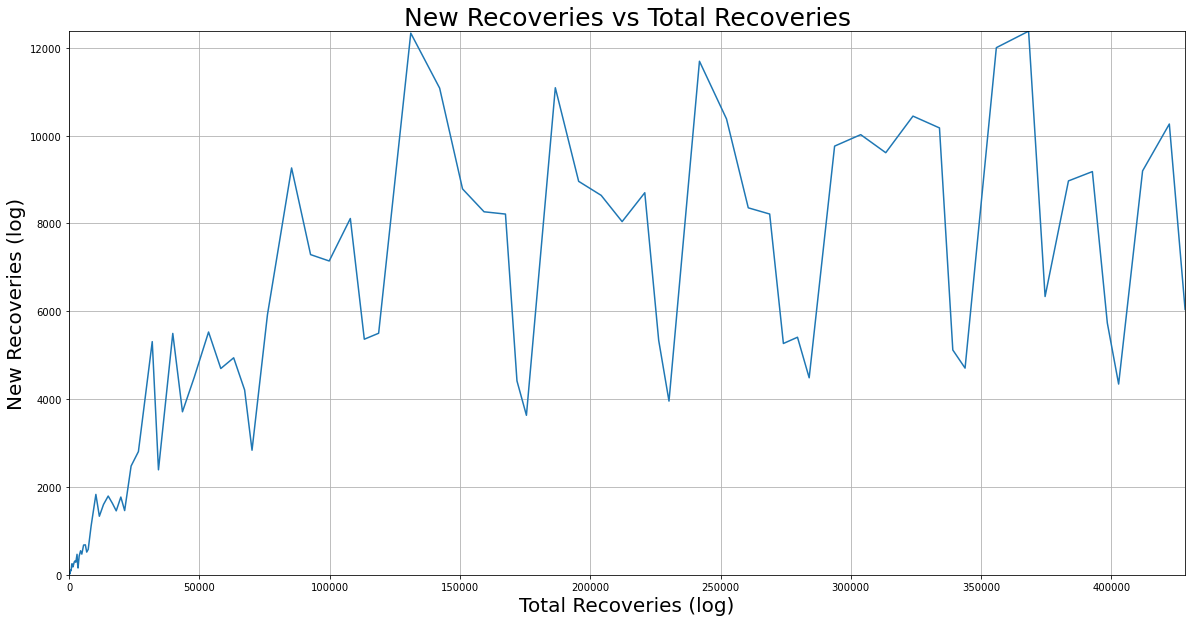

In [76]:
plt.figure(figsize=(20, 10))
df = recovered_new_vs_total[recovered_new_vs_total['Country/Region'] == 'Russia']
plt.plot(df['Daily Total Recoveries'], df['Daily New Recoveries'])
plt.margins(0)
plt.grid(True)
plt.title('New Recoveries vs Total Recoveries', fontsize=25)
plt.ylabel('New Recoveries (log)', fontsize=20)
plt.xlabel('Total Recoveries (log)', fontsize=20)
plt.show()

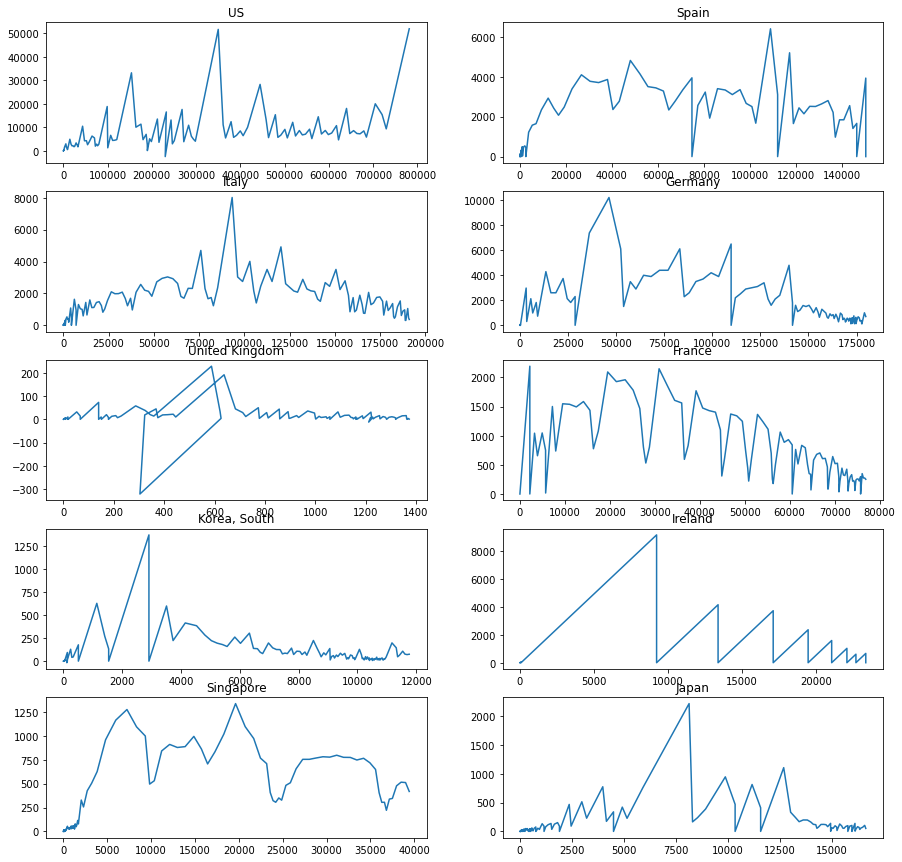

In [77]:
fig,a =  plt.subplots(5,2, figsize=(15,15))
x = 0
for i in range(0, 5):
    for j in range(0, 2):
        country = highlighted_countries[x]
        df = recovered_new_vs_total[recovered_new_vs_total['Country/Region'] == country]
        a[i][j].plot(df['Daily Total Recoveries'], df['Daily New Recoveries'])
        a[i][j].set_title(country)
        x = x + 1
plt.show()

In [78]:
recovered_new_vs_total_test = recovered_new_vs_total[recovered_new_vs_total['Country/Region'] == 'United Kingdom']
recovered_new_vs_total_test = recovered_new_vs_total_test[(recovered_new_vs_total_test['Daily New Recoveries'] < 0)]
recovered_new_vs_total_test

,Country/Region,Date,Daily Total Recoveries,Daily New Recoveries
15594,United Kingdom,2020-04-13,304,-322
25182,United Kingdom,2020-06-03,1212,-12


In [79]:
recovered_new_vs_total_test = recovered_new_vs_total[recovered_new_vs_total['Country/Region'] == 'United Kingdom']
recovered_new_vs_total_test = recovered_new_vs_total_test[recovered_new_vs_total_test['Date'] > '2020-04-09']
recovered_new_vs_total_test = recovered_new_vs_total_test[recovered_new_vs_total_test['Date'] < '2020-04-17']
recovered_new_vs_total_test

,Country/Region,Date,Daily Total Recoveries,Daily New Recoveries
15030,United Kingdom,2020-04-10,588,229
15218,United Kingdom,2020-04-11,622,34
15406,United Kingdom,2020-04-12,626,4
15594,United Kingdom,2020-04-13,304,-322
15782,United Kingdom,2020-04-14,323,19
15970,United Kingdom,2020-04-15,368,45
16158,United Kingdom,2020-04-16,375,7


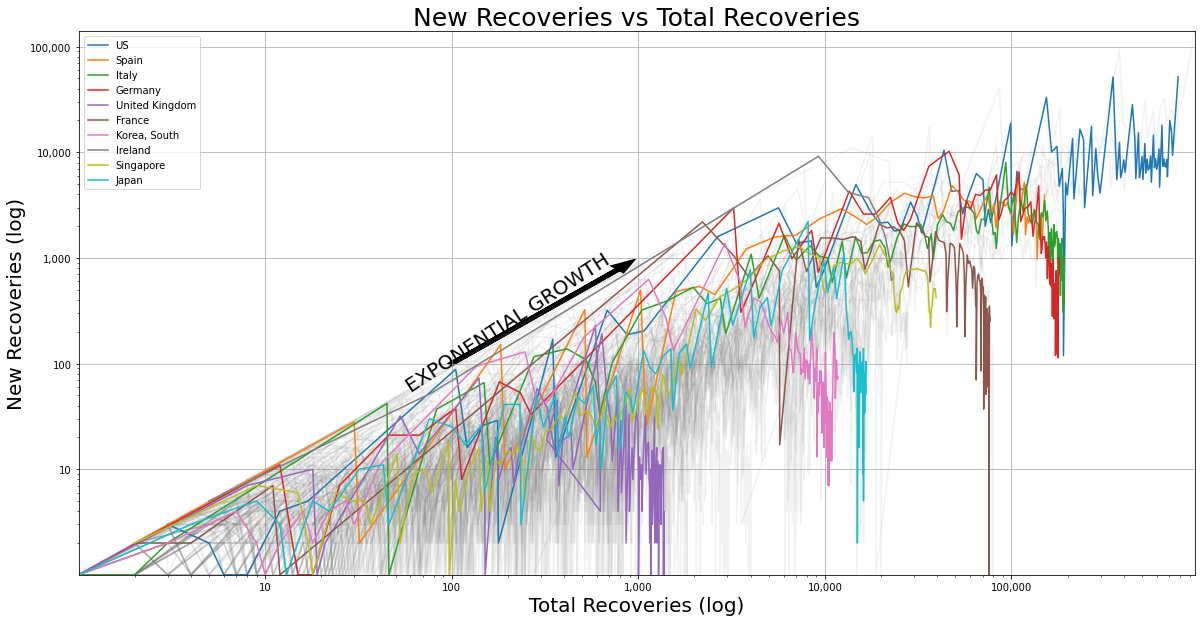

In [80]:
plt.figure(figsize=(20, 10))

for country in gray_countries: 
    df = recovered_new_vs_total[recovered_new_vs_total['Country/Region'] == country]
    df = df[(df['Daily New Recoveries'] > 0)]
    plt.plot(df['Daily Total Recoveries'], df['Daily New Recoveries'], color="grey", alpha=0.1)

for country in highlighted_countries: 
    df = recovered_new_vs_total[recovered_new_vs_total['Country/Region'] == country]
    df = df[(df['Daily New Recoveries'] > 0)]
    plt.plot(df['Daily Total Recoveries'], df['Daily New Recoveries'], label= country)

leg = plt.legend();
plt.yscale('log')
plt.xscale('log')
plt.yticks([0, 10, 100, 1000, 10000, 100000], 
           ['0', '10', '100', '1,000', '10,000', '100,000'])
plt.xticks([0, 10, 100, 1000, 10000, 100000, 1000000], 
           ['0', '10', '100', '1,000', '10,000', '100,000', '1,000,000'])
plt.margins(0)
plt.grid(True)
plt.title('New Recoveries vs Total Recoveries', fontsize=25)
plt.ylabel('New Recoveries (log)', fontsize=20)
plt.xlabel('Total Recoveries (log)', fontsize=20)

#arrow
plt.arrow(100, 100, 800, 800, lw = 5, length_includes_head=True, head_width=100)
plt.text(200, 1200, 'EXPONENTIAL GROWTH', fontsize=20, rotation=33, horizontalalignment='center', verticalalignment='top', multialignment='center')

plt.show()